In [9]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import umap
%matplotlib inline

In [10]:
data = pd.read_csv('./diabetes_data_upload.csv')
data = data.dropna()

In [11]:


a = np.array(data['Age'].values.tolist())
# binning of the age feature)
a[(a >= 10) & (a < 20)] = 1
a[(a >= 20) & (a < 30)] = 2
a[(a >= 30) & (a < 40)] = 3
a[(a >= 40) & (a < 50)] = 4
a[(a >= 50) & (a < 60)] = 5
a[(a >= 60) & (a < 70)] = 6
a[(a >= 70) & (a < 80)] = 7
a[(a >= 80) & (a < 90)] = 8
a[(a >= 90)]            = 9
data['Age'] = a.tolist()
# print(data['Age'])
data['Gender'] = data['Gender'].replace({'Male':0, 'Female':1})
for feature in ['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity']:
    data[feature] = data[feature].replace({'No':0, 'Yes':1})

diabetes_data = data[
    [
        'Age',
        'Gender',
        'Polyuria', 
        'Polydipsia', 
        'sudden weight loss', 
        'weakness', 
        'Polyphagia', 
        'Genital thrush', 
        'visual blurring', 
        'Itching', 
        'Irritability', 
        'delayed healing', 
        'partial paresis', 
        'muscle stiffness', 
        'Alopecia', 
        'Obesity'                
    ]
].values
#scaled_diabetes_data = StandardScaler().fit_transform(diabetes_data)
# diabetes_data[:,0]

In [12]:
# reducer = umap.UMAP(n_neighbors=20, min_dist=0.4)
reducer = umap.UMAP()
embedding = reducer.fit_transform(diabetes_data)

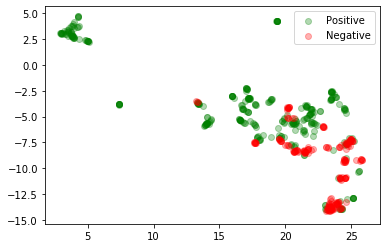

In [13]:
fig, ax = plt.subplots()
x_vis = embedding[:, 0][data['class']=='Positive']
y_vis = embedding[:, 1][data['class']=='Positive']
ax.scatter(x_vis, y_vis, color='green', label='Positive', alpha=0.3)

x_vis = embedding[:, 0][data['class']=='Negative']
y_vis = embedding[:, 1][data['class']=='Negative']
ax.scatter(x_vis, y_vis, color='red', label='Negative', alpha=0.3)

ax.legend()
plt.show()


In [14]:
# MUSHROOM
import category_encoders as ce
column_names = ['class',
                'cap-shape',
                'cap-surface',
                'cap-color',
                'bruises?',
                'odor',
                'gill-attachment',
                'gill-spacing',
                'gill-size',
                'gill-color',
                'stalk-shape',
                'stalk-root',
                'stalk-surface-above-ring',
                'stalk-surface-below-ring',
                'stalk-color-above-ring',
                'stalk-color-below-ring',
                'veil-type',
                'veil-color',
                'ring-number',
                'ring-type',
                'spore-print-color',
                'population',
                'habitat']
mushrooms = pd.read_csv('./agaricus-lepiota.data', names=column_names)
X = mushrooms.drop(columns='class')
X = ce.OneHotEncoder(use_cat_names=True).fit_transform(X)

y = mushrooms['class'].replace({'p':0, 'e':1})

X.head()

mushroom_data = X.values



In [15]:
reducer = umap.UMAP(n_neighbors=5)
embedding = reducer.fit_transform(mushroom_data)

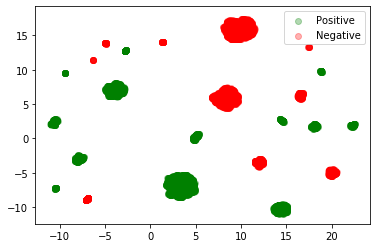

In [16]:
fig, ax = plt.subplots()
x_vis = embedding[:, 0][y==1]
y_vis = embedding[:, 1][y==1]
ax.scatter(x_vis, y_vis, color='green', label='Positive', alpha=0.3)

x_vis = embedding[:, 0][y==0]
y_vis = embedding[:, 1][y==0]
ax.scatter(x_vis, y_vis, color='red', label='Negative', alpha=0.3)

ax.legend()
plt.show()